# The irreducible mass of black holes

For a BH of mass $M$ spin $\chi\in [0,1]$, the irreducible mass is 
\begin{equation}
M_{\rm irr} = %\sqrt{\frac{M^2+\sqrt{M^4-S^2}}{2}} = 
 M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}
\label{mirrdef}
\end{equation}
For convenience, let us define 

$$f(\chi) = \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}} = \frac{M_{\rm irr}}{M}$$

Suppose you have repeated measurments of $M$ and $\chi$. This is just because we're still frequentists for now. When we will put our Bayesian hat on, these distributions will be the *posterior samples* from a single measurement.

Let's assume that

- the spin $\chi$ is uniformly distributed between 0 and 1.
- the mass $M$ is normally distributed with mean $\mu$ and standard deviation $\sigma$.

These are simplistic assumption that, however, are not too far from what we are now measuring with gravitational-wave detectors. It's a toy model, but not a totally unreasonable one.

**Tasks**:

1. Start with a value of $\sigma=0.02$. Note that $\mu$ is a scale and not a parameter: you can normalize all quantities with a dimension of mass by $\mu$. Just set $\mu=1$ in your code and remember that all masses in the problem are measured in units of $\mu$. 

2. Plot the resulting pdf of $M_{\rm irr}$. First try an histogram with one the rules of thumb we've seen above.

*Hint*: You don't know the functional form of the pdf of $M_{\rm irr}$... but you don't need it if you just want to generate samples! That's the nice thing about numerics!

3. Using the same samples, plot the distribution of $M_{\rm irr}$ using a KDE.

4. Compute the KS distance between ${M_{\rm irr}}$ and ${f}$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$. 

5. Compute the KS distance between ${M_{\rm irr}}$ and $M$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.

6. You should find that (i) $M_{\rm irr}$ is distributed like $f$ if ${\sigma}\ll \mu$ and (ii) $M_{\rm irr}$ is distributed like $M$ if  $\sigma\gg \mu$.


7. Compute the pdfs of $M_{\rm irr}$ from their mathematical definitions, plot them, and check they agree with your KDE.

*Hint (for point 7 above)*: First compute the pdf of $f$, that is just a change of variable. We saw how to do this in a previous lecture. The answer is:
\begin{equation}
\pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}}\,.
\end{equation}

*Another hint (still for point 7 above)*: Then compute the pdf of $M_{\rm irr}$, you want to use [this theorem](https://en.wikipedia.org/wiki/Distribution_of_the_product_of_two_random_variables) for the product of two random variables. The answer is only semi-analytic (unless you know how to solve that integral? If so please tell me!)
\begin{equation}
p(M_{\rm irr})  = \frac{\sqrt{2/\pi}}{\sigma} \int_{1/\sqrt{2}}^1 \exp\left[{-\frac{(M_{\rm irr}/f -\mu)^2}{2\sigma^2}}\right]  \frac{2 f^2-1}{f \sqrt{1 - f^2}}  \,\, {\rm d}f\,. \label{pmirr}
\end{equation}
This can be easily solved numerically.

*Yet another hint:* If any any time you get lost in the calculation, it helps checking that your pdfs are normalized as they should.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm 
from astropy.visualization.hist import hist as fancyhist
from sklearn.neighbors import KernelDensity
import scipy.stats
from scipy import integrate
from sklearn.neighbors import KernelDensity

## Histogram with the two rules

In [2]:
#Function of the irreducible mass
def Mirr(M, chi):   
    return M*np.sqrt((1+np.sqrt(1-chi**2))/2)

def f(M, Mirr):
    return Mirr/M

Text(0.5, 1.0, 'Irreducible mass')

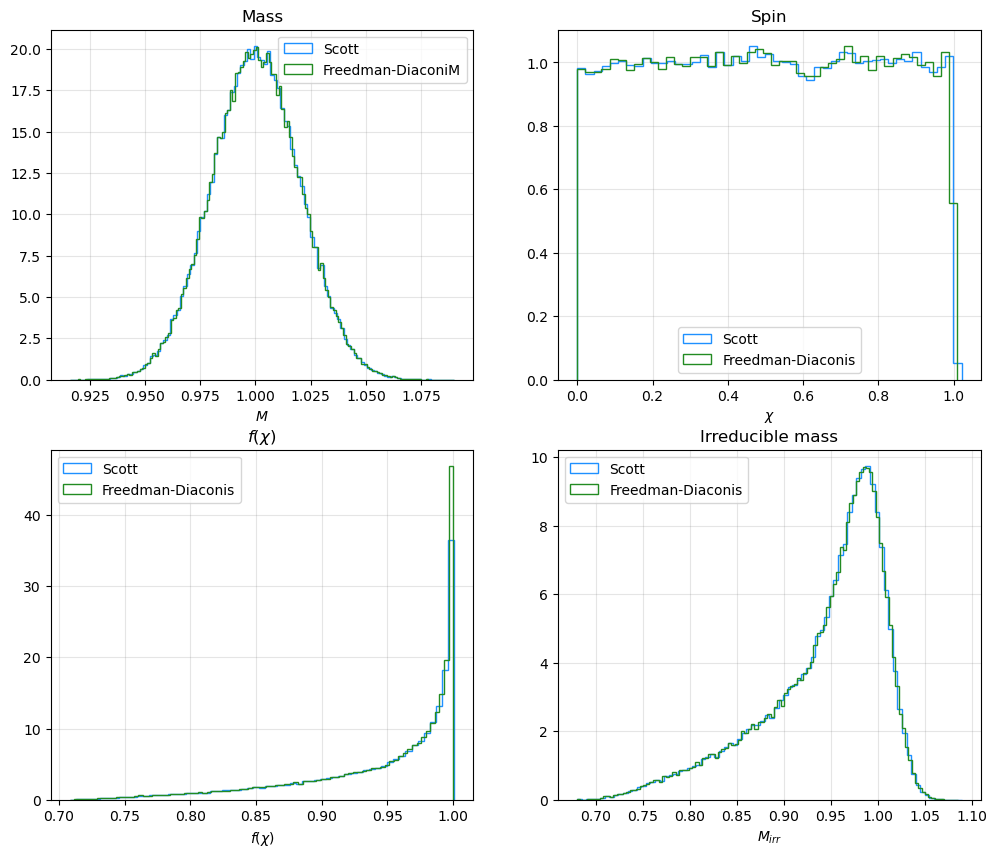

In [3]:
N = 100000
mu = 1         #All masses in the problem are measured in units of mu
sigma = 0.02

chi = np.random.uniform(0, 1, N)  #The spin is uniformly distributed between 0 and 1.
M = np.random.normal(mu, sigma, N) #The mass is normally distributed with mean mu and standard deviation sigma

#M_irr for each mass and chi 
M_irr = Mirr(M, chi)  

#Evaluate f
f_chi = f(M, M_irr)

#I plot the histogram using the Freedman and the Scott rule for the bins
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

#Mass
fancyhist(M, bins='scott', density = True, ax = ax[0, 0], histtype = 'step', linewidth = 1,  color = 'dodgerblue', label="Scott")
fancyhist(M, bins='freedman', density = True, ax = ax[0, 0], histtype = 'step', linewidth = 1,  color = 'forestgreen', label="Freedman-DiaconiM")
ax[0, 0].grid(c='grey', alpha = 0.2)
ax[0, 0].legend()
ax[0, 0].set_xlabel('$M$')
ax[0, 0].set_title('Mass')

#Spin
fancyhist(chi, bins='scott', density = True, ax = ax[0, 1], histtype = 'step', linewidth = 1,  color = 'dodgerblue', label="Scott")
fancyhist(chi, bins='freedman', density = True, ax = ax[0, 1], histtype = 'step', linewidth = 1,  color = 'forestgreen', label="Freedman-Diaconis")
ax[0, 1].grid(c='grey', alpha = 0.2)
ax[0, 1].legend()
ax[0, 1].set_xlabel('$\\chi$')
ax[0, 1].set_title('Spin')

#f
fancyhist(f_chi, bins='scott', density = True, ax = ax[1, 0], histtype = 'step', linewidth = 1,  color = 'dodgerblue', label="Scott")
fancyhist(f_chi, bins='freedman', density = True, ax = ax[1, 0], histtype = 'step', linewidth = 1,  color = 'forestgreen', label="Freedman-Diaconis")
ax[1, 0].grid(c='grey', alpha = 0.2)
ax[1, 0].legend()
ax[1, 0].set_xlabel('$f(\\chi)$')
ax[1, 0].set_title('$f(\\chi)$')

#M_irr
fancyhist(M_irr, bins='scott', density = True, ax = ax[1, 1], histtype = 'step', linewidth = 1,  color = 'dodgerblue', label="Scott")
fancyhist(M_irr, bins='freedman', density = True, ax = ax[1, 1], histtype = 'step', linewidth = 1,  color = 'forestgreen', label="Freedman-Diaconis")
ax[1, 1].grid(c='grey', alpha = 0.2)
ax[1, 1].legend()
ax[1, 1].set_xlabel('$M_{irr}$')
ax[1, 1].set_title('Irreducible mass')


## KDE

In [5]:
#I defne a function for genereting the distribution of M_irr using a KDE
def KDE(M_irr, bandwidth, kernel):    
   KDE = KernelDensity(bandwidth=bandwidth, kernel= kernel) 
   KDE.fit(M_irr[:, np.newaxis]) #Sklearn returns log(density)
   return np.exp(KDE.score_samples(Mgrid[:, np.newaxis]))

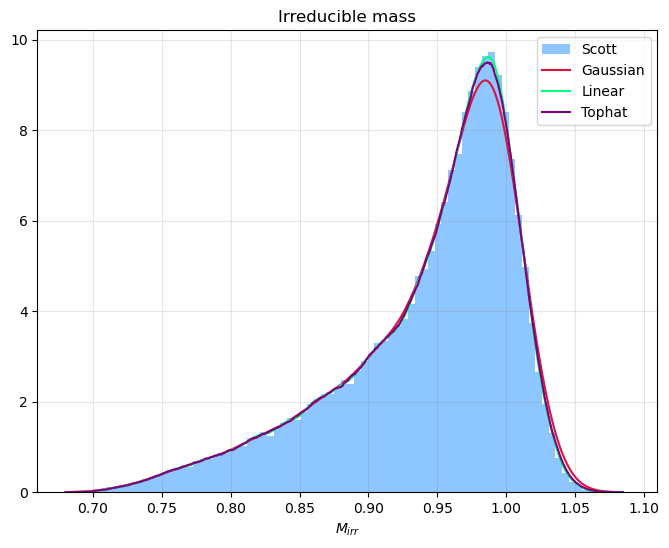

In [8]:
#Use this instead of M_irr for plotting
Mgrid = np.linspace(M_irr.min(), M_irr.max(), 1000) 

fig2 = plt.figure(figsize=(8,6))
ax2 = fig2.gca()
ax2.grid(c='grey', alpha = 0.2)
ax2.set_xlabel('$M_{irr}$')

ax2.set_title('Irreducible mass')
fancyhist(M_irr, bins='scott', density = True, ax= ax2, histtype = 'stepfilled', linewidth = 1,  color = 'dodgerblue', label="Scott", alpha=0.5)

#I plot it using different kernel but with the same bandwidth
kde_gauss = KDE(M_irr, 0.01, kernel = 'gaussian')
ax2.plot(Mgrid, kde_gauss, color = 'crimson', label= 'Gaussian')

kde_lin = KDE(M_irr, 0.01, 'linear')
ax2.plot(Mgrid, kde_lin, color = 'springgreen', label= 'Linear')

kde_top = KDE(M_irr, 0.01, 'tophat')
ax2.plot(Mgrid, kde_top, color = 'purple', label= 'Tophat')

ax2.legend()

The best kernel seems the linear one with this bandwidth

## KS distance between f and $M_{irr}$

In [11]:
#Now I need to evaluate the KS distance with different sigmas
#First we need different distribution of M and M_irr with different sigmas
sigmas = np.logspace(-5,5,20)
masses = []

for i in sigmas:
    masses.append(np.random.normal(mu, i, N)) #List of 20 elements, each an array of float

masses_irr = []
for i in masses:
    masses_irr.append(Mirr(i, chi)) #List of 20 elements, each an array of float

function = []
for i in range(len(masses)):
    function.append(f(masses[i], masses_irr[i]))

Text(0.5, 1.0, 'KS distance between $M_{irr}$ and $f$ as a function of $\\sigma$')

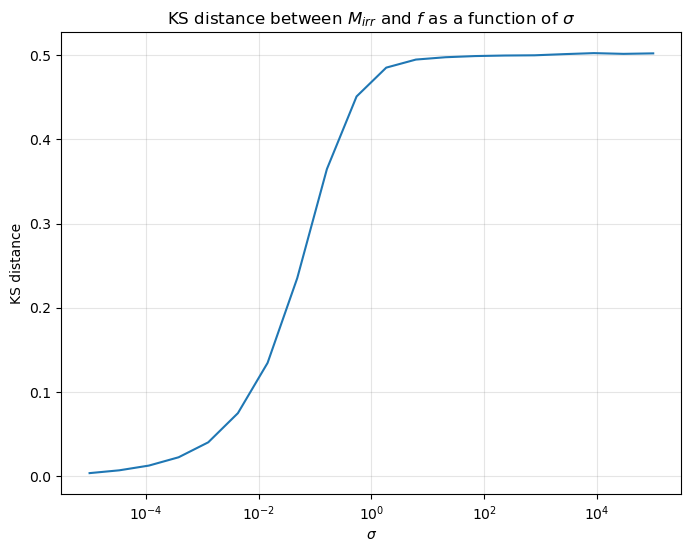

In [12]:
ks_test_irr = []
for i in range(len(masses)) :
     ks_test_irr.append(scipy.stats.ks_2samp(masses_irr[i], function[i]).statistic)

#Plot KS distance between M_{irr} and f as a function of sigma
fig1 = plt.figure(figsize=(8,6))
ax1 = fig1.gca()
ax1.grid(c='grey', alpha = 0.2)
ax1.plot(sigmas, ks_test_irr)
ax1.set_xscale('log')
ax1.set_xlabel('$\sigma$')
ax1.set_ylabel('KS distance')
ax1.set_title('KS distance between $M_{irr}$ and $f$ as a function of $\sigma$')

As we can observe in the plot, the KS distance between the irreducible mass and the function f becomes smaller and smaller $\sigma << \mu$, meaning that the distributions are the same.

## KS distance between M and $M_{irr}$

Text(0.5, 1.0, 'KS distance between $M_{irr}$ and $M$ as a function of $\\sigma$')

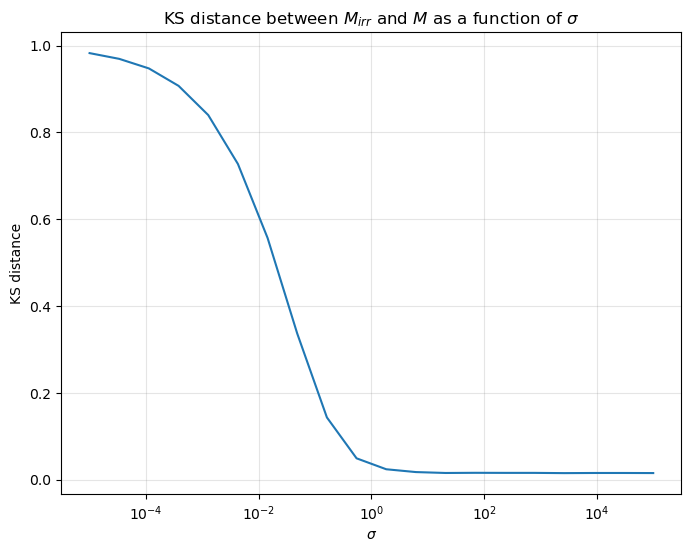

In [22]:
#Compute the KS distance between M_{irr} and M as a function of sigma.
ks_test = []
for i in range(len(masses)) :
     ks_test.append(scipy.stats.ks_2samp(masses_irr[i], masses[i]).statistic)

#Plot it
fig3 = plt.figure(figsize=(8,6))
ax3 = fig3.gca()    
ax3.plot(sigmas, ks_test)
ax3.set_xscale('log')
ax3.grid(c='grey', alpha = 0.2)
ax3.set_xlabel('$\sigma$')
ax3.set_ylabel('KS distance')
ax3.set_title('KS distance between $M_{irr}$ and $M$ as a function of $\sigma$')

The KS distance between the irreducible mass and the mass becomes smaller for $\sigma >> \mu$, meaning that the distributions are the same.

## PDF of $M_{irr}$ from PDF of f and M

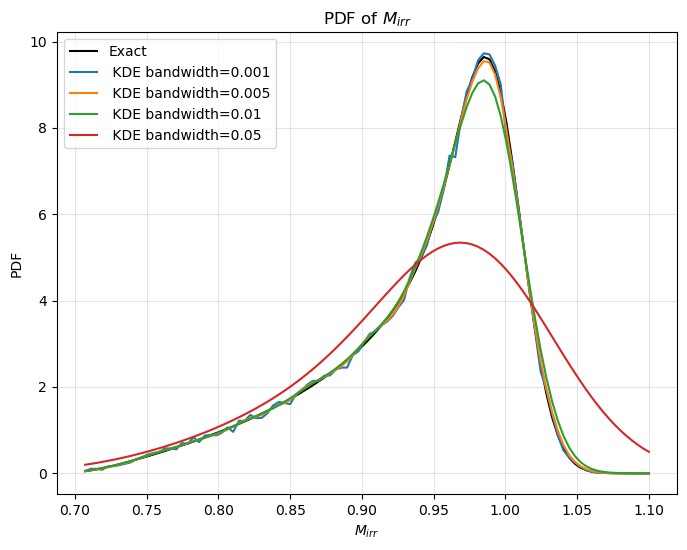

In [13]:
#Pdf of Mirr
#I know that Mirr=M*f(chi), I know the distribution of chi and M that is the normal one
#I can use the tranformation rule to derive the pdf of f

m_irr_grid = np.linspace(min(1-5*sigma, 1/2**0.5), 1+5*sigma, 100)

#Compute the pdf of f 
def pdf_f(f):
    return np.abs((2-4*f**2) / np.sqrt(1 - f**2)) #Remember that chi is uniformely distributed bt 0 and 1 so pdf(chi)=1!

#Definition of the integrand for the convolution
def integrand(f, masses, mu, sigma):
    return (pdf_f(f)*norm.pdf(masses/f, mu, sigma))/np.abs(f)

Mirr_pdf=[]
for xt in m_irr_grid:  
    Mirr_pdf.append(integrate.quad(lambda f: integrand(f, xt, mu, sigma), 1/np.sqrt(2), 1)[0])

fig4 = plt.figure(figsize=(8,6))
ax4 = fig4.gca()    
ax4.plot(m_irr_grid, Mirr_pdf, label='Exact', c='black')
#ax4.set_yscale('log')
ax4.grid(c='grey', alpha = 0.2)
#ax4.set_yscale('log')
ax4.set_xlabel('$M_{irr}$')
ax4.set_ylabel('PDF')
ax4.set_title('PDF of $M_{irr}$')

#Now we evaluate it using KDE method
#Load the KDE module

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(m_irr_grid[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)

bandwidth = [0.001, 0.005, 0.01, 0.05] #Try different bandwidth

for i in bandwidth:
    kdepdf = kde_sklearn(M_irr, bandwidth=i, kernel="gaussian")

    ax4.plot(m_irr_grid, kdepdf, label=' KDE bandwidth='+str(i))

ax4.legend();


From the plot we can observe that bandwidth=0.5 is too large and gives a wrong prediction for the pdf. The best value would be aropund 0.005 because the 0.001 is too small (we start to see noise).